In [4]:
# Imports: 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


### Funckja celu:

In [5]:
# Objective function: 

def cross_in_tray(XY):
    X, Y = XY
    return -0.0001 * (np.abs(np.sin(X) * np.sin(Y) * np.exp(100 - np.sqrt(X ** 2 + Y ** 2) / np.pi)) + 1) ** 0.1 * -1

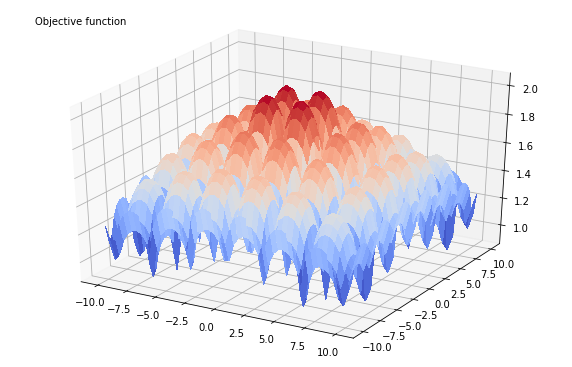

In [6]:
# Objective function plot generator: 

def plot_generator(function, X: np.array, Y: np.array, title = 'Objective function'):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    fig.set_size_inches(10,6.5)
    ax.text2D(0.05, 0.95, title, transform=ax.transAxes)
    X, Y = np.meshgrid(X, Y)
    Z = function([X, Y])
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

x = np.linspace(-10,10)
y = np.linspace(-10,10)

plot_generator(cross_in_tray, x, y)

In [7]:
from math import log2

def nbits(a, b, dx):
    n = (b - a) / dx + 1
    B = int(log2(n)) + 1
    dx = (b - a) / ((2 ** B) - 1)
    return B, dx

In [8]:
def decode_individual(individual, N, B, a, dx):
    values = np.split(np.array(individual), N)
    return [ a  + np.sum([value[i] * 2 ** (len(value) - 1 - i) for i in range(0,len(value))])*dx for value in values]

In [9]:
def generate_population(P, N, B):
    return np.random.randint(0,2,(P, N*B))

In [10]:
def evaluate_population(objective_function, population, N, B, a, dx):
    return np.array([objective_function(decode_individual(individual, N, B, a, dx)) for individual in population])


In [11]:
def best_individual(population, evaluated_population):
    index = np.argmax(evaluated_population)
    return {'individual': population[index], 'value': evaluated_population[index]}

### Roulette: 

In [12]:
import random

def roulette(population: np.array, evaluated_population: np.array):
    const = np.max(np.abs(evaluated_population)) + 1
    evaluated_population = evaluated_population + const
    eval_sum = np.sum(evaluated_population)
    eval_range = np.cumsum([eval_individual / eval_sum for eval_individual in evaluated_population])

    random_values = np.random.rand(len(population))
    new_population = []

    for random_value in random_values:
        indexes, *b = np.where(eval_range < random_value)
        survivor = population[len(indexes)]
        new_population.append(survivor)

    return np.array(new_population)

### Cross:

In [14]:
import random

def cross(population, cross_probability):
    new_pop = []
    pop_len = len(population)
    for index in range(0, pop_len):
        if random.uniform(0, 1) < cross_probability:
            locus = random.randint(0, len(population[index]))
            index2 = -len(population) + index + 1
            offspring = np.concatenate((population[index][0:locus], population[index2][locus::]))
            new_pop.append(offspring)
        else:
            offspring = population[index]
            new_pop.append(offspring)
    return np.array(new_pop)


### Mutate: 

In [15]:
import random

def mutate(pop, pm):
    new_pop = []
    for individual in pop:
        new_individual = []
        for bit in individual:
            if pm < random.uniform(0, 1):
                if bit == 0:
                    new_individual.append(1)
                else:
                    new_individual.append(0)
            else:
                new_individual.append(bit)
        new_pop.append(new_individual)

    new_pop = np.array(new_pop)
    return new_pop

### Genetic algorithm: 

In [16]:
def Genetic_algorithm(objective_function, population_size, N, B, a, code_precision, cross_probability, mutation_probability, generations):
    
    list_best = []
    list_best_generations = []
    list_mean = []
    

    population = generate_population(population_size, N, B)
    evaluated_population = evaluate_population(objective_function, population, N, B, a, dx_new)

    best = best_individual(population, evaluated_population)
    best_generation = 0
    list_best.append(best['value'])
    list_best_generations.append(best['value'])
    list_mean.append(np.sum(evaluated_population)/len(evaluated_population))

    for i in range(0, generations):
          
          population = roulette(population, evaluated_population)
          population = cross(population, cross_probability)
          population = mutate(population, mutation_probability)
          evaluated_population = evaluate_population(objective_function, population, N, B, a, dx_new)


          next_best = best_individual(population, evaluated_population)

          if next_best['value'] > best['value']:
             best = next_best
             best_generation = i
          
          list_best.append(best['value'])
          list_best_generations.append(next_best['value'])
          list_mean.append(np.sum(evaluated_population)/len(evaluated_population))

    return { 'The best solution': best,
             'The best generation': best_generation,
             'List of the best': list_best,
             'List of the best in all populations': np.array(list_best_generations),
             'Average eval in generation': np.array(list_mean)
           }

{'individual': array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0]), 'value': 2.0323263199667294}


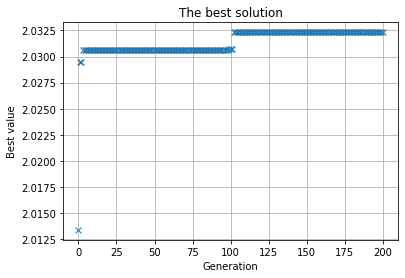

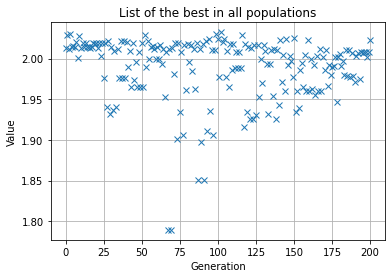

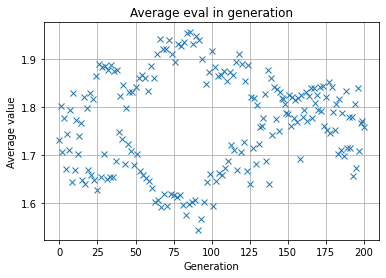

In [18]:
# Main

population_size = 60
a = 0
b = 1
dx = 1e-10
N = 2

B, dx_new = nbits(a, b, dx)

cross_probability = 0.7
mutation_probability = 0.01
generations = 200

results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, cross_probability, mutation_probability, generations)

best = results['The best solution']
results['The best generation']
list_best = results['List of the best']
list_best_generations = results['List of the best in all populations']
list_mean = results['Average eval in generation']


# print(best)
# individual = best['individual']
# values = decode_individual(individual, N,B,a, dx_new)
# print(cross_in_tray([values[0],values[1]]))

print(best)

x = np.arange(0, generations + 1)

plt.subplot(1, 1, 1)
plt.plot(x,list_best , 'x', lw=1)

plt.xlabel('Generation')
plt.ylabel('Best value')
plt.title('The best solution')
plt.grid(True)
plt.show()

plt.subplot(1, 1, 1)
plt.plot(x, list_best_generations, 'x', lw=1)
plt.title('List of the best in all populations')
plt.grid(True)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()


plt.subplot(1, 1, 1)
plt.plot(x, list_mean, 'x', lw=1)
plt.title('Average eval in generation')
plt.grid(True)
plt.xlabel('Generation')
plt.ylabel('Average value')
plt.show()